In [41]:
from sklearn import datasets

In [42]:
diabetes_data = datasets.load_diabetes()

In [43]:
diabetes_data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [44]:
diabetes_features = diabetes_data['data']
diabetes_features[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [45]:
diabetes_target = diabetes_data['target']
diabetes_target[0:5]

array([151.,  75., 141., 206., 135.])

In [130]:
import pandas as pd
diabetes_prima = pd.read_csv("C:\\Users\\Ganesh\\Desktop\\Machine Learning\\Untitled Folder\\pima-indians-diabetes.txt")
diabetes_prima.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [135]:
diabetes_features = diabetes_prima[["pregnancies","glucose","diastolic","triceps","insulin","bmi","dpf","age"]]
diabetes_features.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age'],
      dtype='object')

In [136]:
diabetes_target = diabetes_prima.diabetes

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test,y_train,y_test = train_test_split(diabetes_features,diabetes_target,test_size=0.3,random_state=42)
len(X_train),len(y_train),len(X_test),len(y_test)

(537, 537, 231, 231)

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [169]:
neighbors=list(range(3,50,2))


In [170]:
diabetes_model = KNeighborsClassifier(n_neighbors=10)
param_grid={'algorithm':['ball_tree','kd_tree','brute'],           
           'n_neighbors':neighbors
           ,'weights':['uniform','distance']}

In [171]:
grid_model = GridSearchCV(diabetes_model,param_grid,cv=5,refit=True)

In [172]:
grid_model

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [173]:
knngrid=grid_model.fit(X_train,y_train)

In [174]:
knngrid.best_score_

0.7467411545623837

In [175]:
knngrid.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=47, p=2,
           weights='distance')

In [176]:
knn_best = knngrid.best_estimator_

In [177]:
y_pred=knn_best.predict(X_test)

In [178]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7272727272727273

In [179]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[134,  17],
       [ 46,  34]], dtype=int64)

In [180]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.89      0.81       151\n           1       0.67      0.42      0.52        80\n\n   micro avg       0.73      0.73      0.73       231\n   macro avg       0.71      0.66      0.66       231\nweighted avg       0.72      0.73      0.71       231\n'

In [181]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba = knn_best.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)


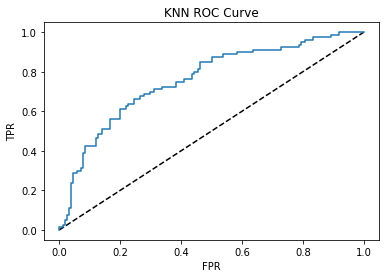

In [182]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.title("KNN ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [184]:
roc_auc_score(y_test,y_pred_proba)

0.7587748344370862